# Descrição do projeto

Este é um projeto simples, a base de dados utilizada é uma base simples<br> 
apenas para fins de estudo e aprendizagem das funções e métodos para<br> 
exploração e limpeza dos dados.

# Importando bibliotecas

In [146]:
import pandas as pd
import seaborn as sns
import statistics as sts

# Importando base de dados

In [147]:
df = pd.read_csv('C:/Users/Usuario/Desktop/Cursos Udemy/Ciência de Dados/10.Prática em Python/dados/tempo.csv', sep=';')
df

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


In [148]:
# Tamanho do dataframe - 14 linhas e 5 colunas
df.shape

(14, 5)

In [149]:
# Visualizar colunas
df.columns

Index(['Aparencia', 'Temperatura', 'Umidade', 'Vento', 'Jogar'], dtype='object')

# Exploração dos dados

### Dados Gerais

In [150]:
# Informações sobre as colunas: quantidade de valores NaN e tipo de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Aparencia    14 non-null     object 
 1   Temperatura  14 non-null     int64  
 2   Umidade      13 non-null     float64
 3   Vento        13 non-null     object 
 4   Jogar        14 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 692.0+ bytes


In [151]:
# Verificando quantidade de valores NaN por coluna
df.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

### Exploração de dados categóricos

##### Aparencia

In [152]:
# Verificando a quantidade de registros por valor
group_aparencia = df.groupby(['Aparencia']).size()
group_aparencia

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

* Registro 'menos' esta fora do domínio.

<Axes: xlabel='Aparencia'>

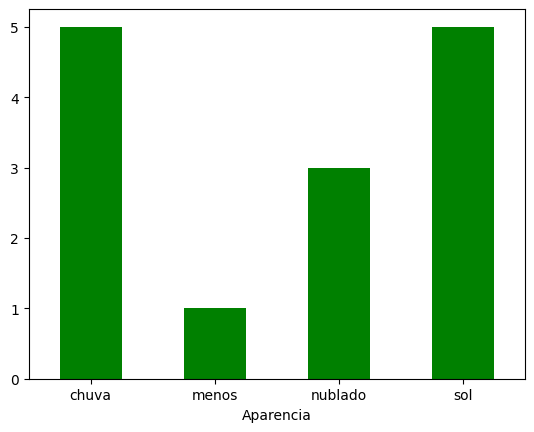

In [153]:
group_aparencia.plot.bar(color = 'green', rot=0)

##### Vento

In [154]:
# Verificando a quantidade de registros por valor
group_vento = df.groupby(['Vento']).size()
group_vento

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

* preencher com a moda o registro com NaN

<Axes: xlabel='Vento'>

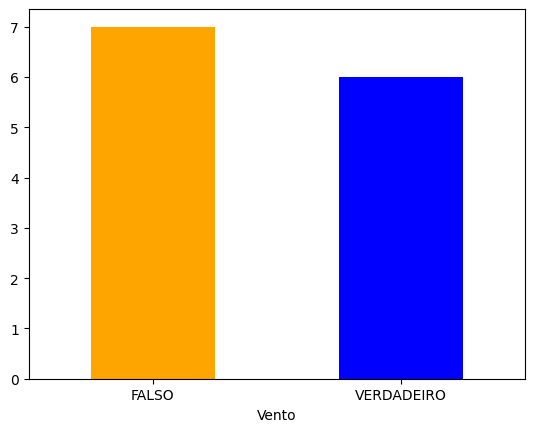

In [155]:
group_vento.plot.bar(color=['orange', 'blue'], rot=0)

##### Jogar

In [156]:
# Verificando a quantidade de registros por valor
group_jogar = df.groupby(['Jogar']).size()
group_jogar

Jogar
nao    5
sim    9
dtype: int64

<Axes: xlabel='Jogar'>

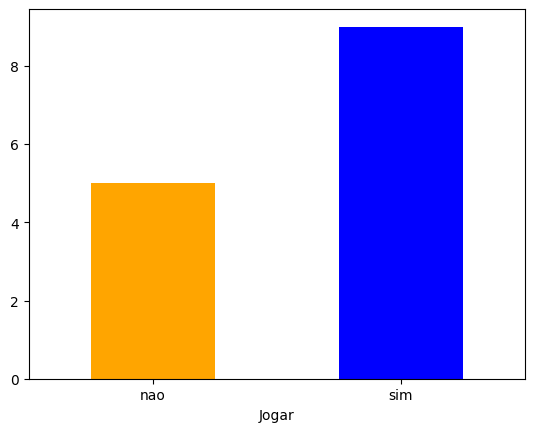

In [157]:
group_jogar.plot.bar(color=['orange', 'blue'], rot=0)

### Exploração de dados numéricos

##### Temperatura

In [158]:
df['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

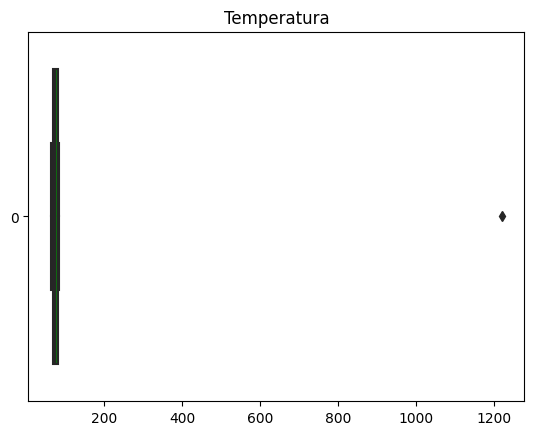

In [159]:
sns.set_palette(palette=['green'])
sns.boxplot(df['Temperatura'], orient='h').set_title('Temperatura')

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Temperatura', ylabel='Count'>

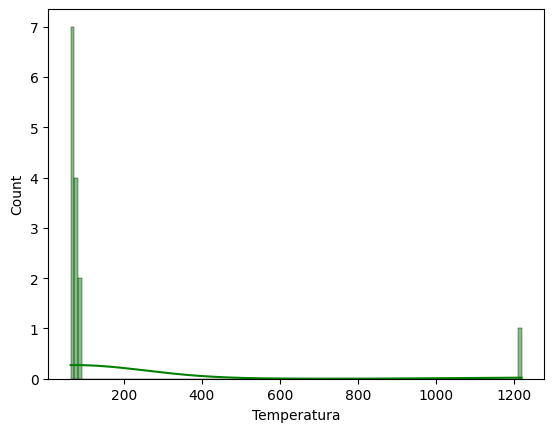

In [160]:
sns.histplot(df['Temperatura'], kde=True)

* Temos um outlier na temperatura. Valor de mais de 1200° F.

##### Umidade

In [161]:
df['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

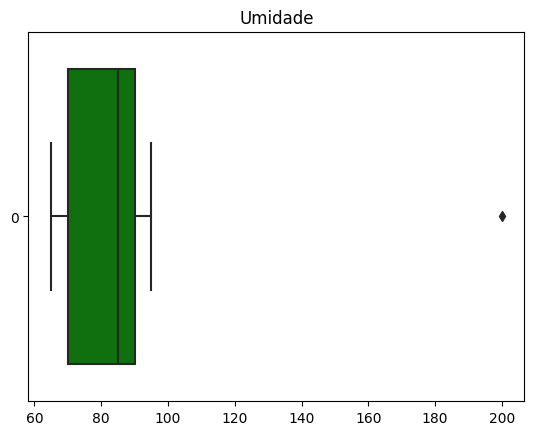

In [162]:
sns.boxplot(df['Umidade'], orient='h').set_title('Umidade')

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Umidade', ylabel='Count'>

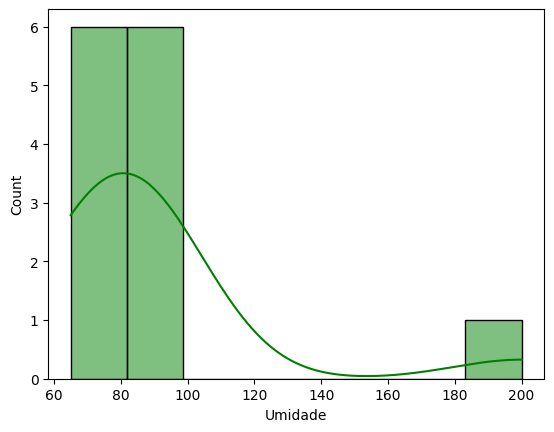

In [163]:
sns.histplot(df['Umidade'], kde=True)

* Percebemos que aqui também possuimos um outlier. Com valor aproximado de 200.

# Limpeza dos dados

### Aparencia

##### Alterando o registro para um valor dentro do domínio

In [164]:
df.loc[df['Aparencia'] == 'menos', 'Aparencia'] = 'chuva'
group_aparencia = df.groupby(['Aparencia']).size()
group_aparencia

Aparencia
chuva      6
nublado    3
sol        5
dtype: int64

### Vento

##### Tratando o registro NaN

In [165]:
df['Vento'].fillna('FALSO', inplace=True)
df['Vento'].isna().sum()

0

### Temperatura

##### Tratando o outlier

In [166]:
df.loc[df['Temperatura'] > 130]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [167]:
median_temp = sts.median(df['Temperatura'])
median_temp

73.5

In [168]:
df.loc[df['Temperatura'] > 130, 'Temperatura'] = int(median_temp)
df.loc[df['Temperatura'] > 130]

,Aparencia,Temperatura,Umidade,Vento,Jogar


### Umidade

##### Tratando o valor NaN

In [169]:
median_umidade = sts.median(df['Umidade'])
median_umidade

85.5

In [170]:
df['Umidade'].fillna(median_umidade, inplace=True)
df['Umidade'].isna().sum()

0

##### Tratando o outlier

In [171]:
df.loc[df['Umidade'] > 100]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75,200.0,FALSO,sim


In [172]:
df.loc[df['Umidade'] > 100, 'Umidade'] = median_umidade
df.loc[df['Umidade'] > 100]

,Aparencia,Temperatura,Umidade,Vento,Jogar


# Verificação Final

In [173]:
# Verificando todo o dataframe
df

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,85.5,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,chuva,64,65.0,VERDADEIRO,sim
7,sol,73,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,85.5,FALSO,sim


In [174]:
# Verificando quantidade de linhas e colunas
df.shape

(14, 5)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Aparencia    14 non-null     object 
 1   Temperatura  14 non-null     int64  
 2   Umidade      14 non-null     float64
 3   Vento        14 non-null     object 
 4   Jogar        14 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 692.0+ bytes
